<a href="https://colab.research.google.com/github/joshipj22/Cars4U-Market-Dynamics/blob/main/Cars24_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Business case Introduction

**Cars24** is one of the leading used-car buying and selling platform in India.

#### Current methodology to estimate the selling price has three major components
1. Past records of the "Selling Prices" of the same _Make_ and _Model_
2. Rule based calculations for the depreciation of the car
2. Rule based calculation for condition of the vehicle


### GOAL: To automate the process of estimating price of the used car



## Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!gdown 15tIjPrstV2RnOMv2VSIKW7yW_M3KjyNa

Downloading...
From: https://drive.google.com/uc?id=15tIjPrstV2RnOMv2VSIKW7yW_M3KjyNa
To: /content/cars24-car-price.csv
100% 1.79M/1.79M [00:00<00:00, 58.6MB/s]


### Overview

In [4]:
df = pd.read_csv("cars24-car-price.csv")
df.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.20,2012.0,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5.0
1,Hyundai Grand i10 Asta,5.50,2016.0,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5.0
2,Hyundai i20 Asta,2.15,2010.0,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5.0
3,Maruti Alto K10 2010-2014 VXI,2.26,2012.0,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5.0
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,2015.0,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5.0


Notice that Variable ```full_name``` contains both ```Maker``` and ```Model``` information - need to extract make and model from full_name.

In [5]:
df.shape

(19980, 11)

In [6]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          19980 non-null  object 
 1   selling_price      19980 non-null  float64
 2   year               19980 non-null  float64
 3   seller_type        19980 non-null  object 
 4   km_driven          19980 non-null  int64  
 5   fuel_type          19980 non-null  object 
 6   transmission_type  19980 non-null  object 
 7   mileage            19980 non-null  float64
 8   engine             19980 non-null  float64
 9   max_power          19980 non-null  float64
 10  seats              19980 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.7+ MB


In [7]:
display(df.describe())

,selling_price,year,km_driven,mileage,engine,max_power,seats
count,19980.000000,19980.000000,1.998000e+04,19980.000000,19980.000000,19980.000000,19980.000000
mean,7.392066,2014.525125,5.824488e+04,19.347219,1476.327401,97.854443,5.317868
std,9.103088,3.249185,5.172509e+04,4.620053,520.449398,45.080670,0.835370
min,0.250000,1991.000000,1.000000e+02,0.000000,0.000000,5.000000,2.000000
25%,3.400000,2013.000000,3.116425e+04,16.800000,1197.000000,73.900000,5.000000
50%,5.200000,2015.000000,5.200000e+04,19.160000,1248.000000,86.700000,5.000000
75%,7.850000,2017.000000,7.400000e+04,22.320000,1582.000000,112.000000,5.000000
max,395.000000,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,14.000000


- `selling_price` ranges from [0.25, 395] - the values seem to be in lakhs.
- `mileage` min is 0, max is 120 - need to check for outliers.
- `engine` min is 0, max is 6752 - values appear to be in "cc" - need to check for outliers.

### Distributions

Lets check the distributions of these features one by one

<Axes: >

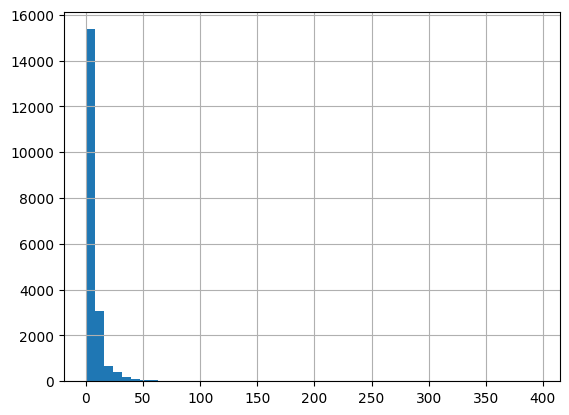

In [8]:
df['selling_price'].hist(bins=50)

Lets check the percntage of outliers. We are manually taking a call that price over a 100 (K) is an outlier by looking at the above plot

In [9]:
(df.loc[df.selling_price > 100].shape[0] / df.shape[0]) * 100

0.055055055055055056

Lets saturate selling price at **100**.

In [10]:
df.loc[df.selling_price > 100, 'selling_price'] = 100

> **INTERACTION**
> -  Can you think of an automated way of deciding this threshold 100 ? Seems like we made this decision arbitarily
> - **Hint:** use quantiles

### Outliers and Missing Values

#### Q: Which plot(s) is/are suitable for outlier visualisation ?

Similarly lets plot a histogram for **mileage**

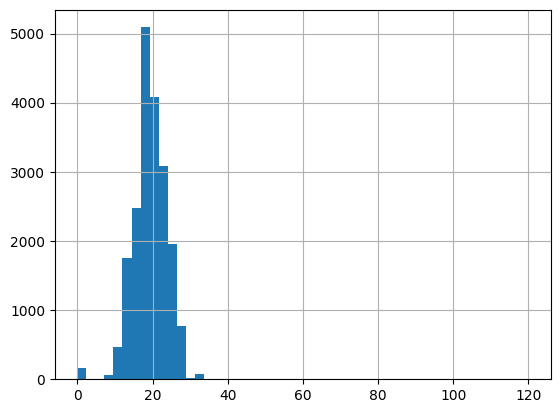

In [11]:
df["mileage"].hist(bins=50);

Another useful plot is called the 'density' plot. Which is also similar to histogram, but with a more *approximate* shape. It tries to fit a suitable distribution over the histogram and hence includes points that might not even be present in data at hand.

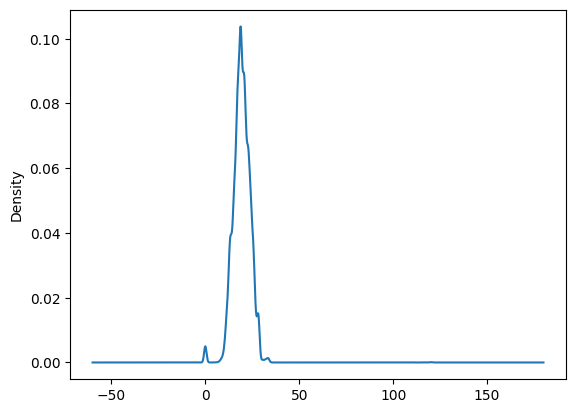

In [12]:
df["mileage"].plot.density();

We observe a skewed plot with right tail to long. An interesting point here would be mileage > 40, because after that it looks like the values mught just be outliers.

Above we saw that there was an unusual peak at **0**. Lets investigate further. Looking at points where mileage is less than 5

In [13]:
df[df["mileage"]<=5].mileage.describe()

,mileage
count,161.000000
mean,0.024845
std,0.315244
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4.000000


Looks like we just have a number of points with mileage 0. That does not make much sense as it cannot be a real value for car mileage. Investigating mileage=0 cases

In [14]:
df.loc[df.mileage == 0].shape[0] / df.shape[0] # 0.8 %

0.008008008008008008

In [15]:
df[df["mileage"] == 0.0].shape

(160, 11)

Thats a very small number of points. We can safely impute, or drop these points later during pre-processing

#### Are the top values errorneous?

Above we had also noticed that there was a significant point at mileage=40. After this there were only very few points and looked like outliers. Lets check them

In [16]:
df[df["mileage"] > 40].mileage.describe()

,mileage
count,4.0
mean,117.5
std,5.0
min,110.0
25%,117.5
50%,120.0
75%,120.0
max,120.0


In [17]:
df[df["mileage"] > 40]

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
11966,Mahindra e2oPlus P6,4.00,2018.0,Dealer,26000,Electric,Automatic,110.0,1476.327401,25.4,4.0
15684,Mahindra e2o T2,3.60,2015.0,Dealer,42862,Electric,Automatic,120.0,0.000000,25.5,5.0
17782,Mahindra e2o T2,4.50,2015.0,Dealer,40000,Electric,Automatic,120.0,0.000000,25.5,5.0
18401,Mahindra e2o Premium,3.25,2013.0,Individual,50000,Electric,Automatic,120.0,0.000000,25.5,5.0


In [18]:
df[df["mileage"] > 40].fuel_type.value_counts()

,count
fuel_type,
Electric,4


- So all vehicles with mileage > 40 are electric vehicles which makes sense.
- So they are not incorrect (error) values.
- Let us not remove these points for now

### Correlations

Now lets look at the correlations of numerical features with target variable selling price.

Since the data is yet to be normalized we can skip the heat map for now
and look for the scatter plot of each feature with the target. This can easily done using pairplot from seaborn library

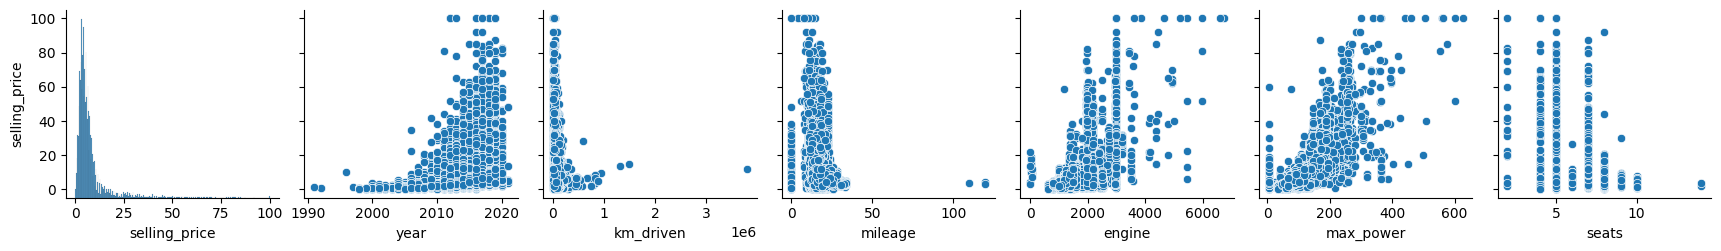

In [19]:
sns.pairplot(df, y_vars=["selling_price"]); # A pair plot (sns.pairplot) is designed to visualize the relationships between numerical variables.

In [20]:
df['seats'].value_counts(normalize=True)

,proportion
seats,
5.0,0.834885
7.0,0.118619
8.0,0.022022
4.0,0.011261
6.0,0.007157
9.0,0.003604
10.0,0.001301
2.0,0.001051
14.0,0.000100


### Categorical Variables

#### How can we extract Make and Model from "full_name"

We have noticed that the name contains the informaiton of the brand and the model. Lets extract those and create new features from them. After that we can drop the original column

In [21]:
df["make"] = df.full_name.apply(lambda x : x.split()[0])
df["model"] = df.full_name.apply(lambda x : " ".join(x.split()[1:]))
df = df.drop("full_name", axis=1)
df.head(2)

,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,make,model
0,1.2,2012.0,Individual,120000,Petrol,Manual,19.7,796.0,46.3,5.0,Maruti,Alto Std
1,5.5,2016.0,Individual,20000,Petrol,Manual,18.9,1197.0,82.0,5.0,Hyundai,Grand i10 Asta


Now let us look at some categorical variables one by one

In [22]:
display(df.describe(include="object"))

,seller_type,fuel_type,transmission_type,make,model
count,19980,19980,19980,19980,19980
unique,3,5,2,42,3321
top,Dealer,Diesel,Manual,Maruti,Swift Dzire VDI
freq,11973,9817,16029,5650,210


In [23]:
df["fuel_type"].value_counts()

,count
fuel_type,
Diesel,9817
Petrol,9767
CNG,316
LPG,66
Electric,14


In [24]:
df["transmission_type"].value_counts()

,count
transmission_type,
Manual,16029
Automatic,3951


In [25]:
df["seller_type"].value_counts()

,count
seller_type,
Dealer,11973
Individual,7817
Trustmark Dealer,190


#### Does selling price vary in some of these groups

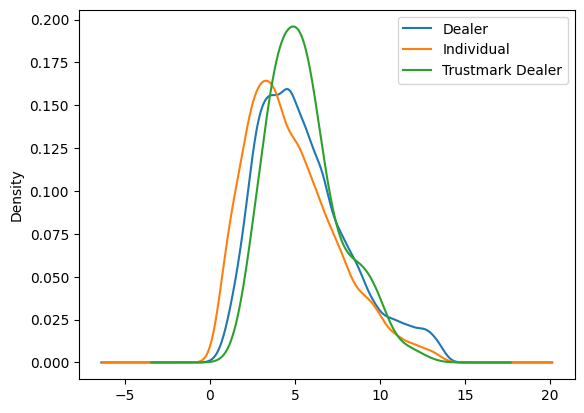

In [26]:
df.loc[df.selling_price<=df.selling_price.quantile(0.9)].groupby('seller_type')['selling_price'].plot.density();
plt.legend();

Looks like for different seller type, the selling price distrubution is not very different. Hence one intuition that can be developed from this plot is that the **seller_type** variable will not turn out to be very important for the ML model. (We will check this later)

#### Lets check for all groups?

Another way to visualise the same is to use a plot known as **box-plot**


Note: Although, `seats` is numeric, but we will consider it as an ordinal variable and perform similar analysis as we do for other categorical variables.

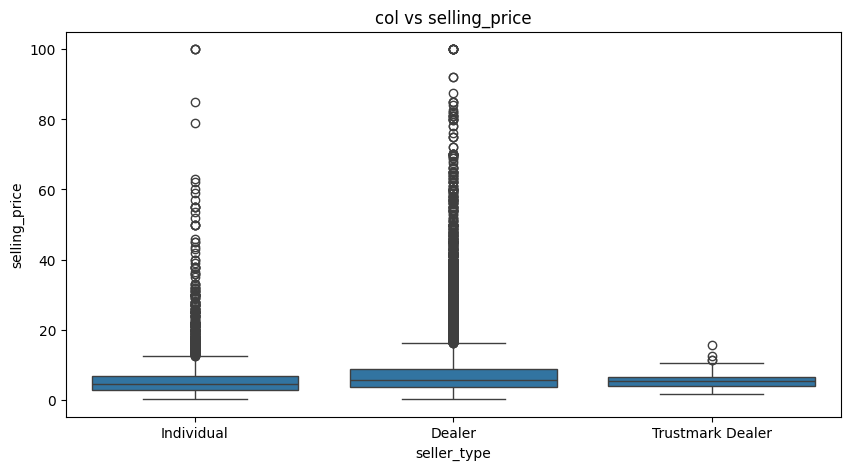

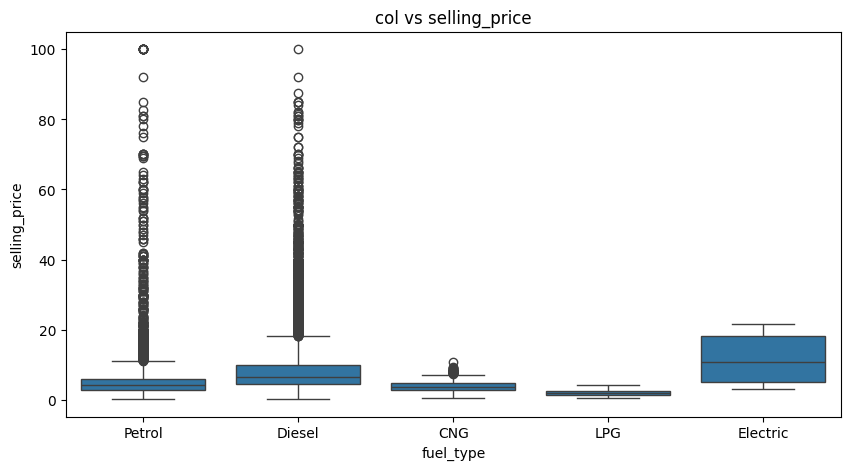

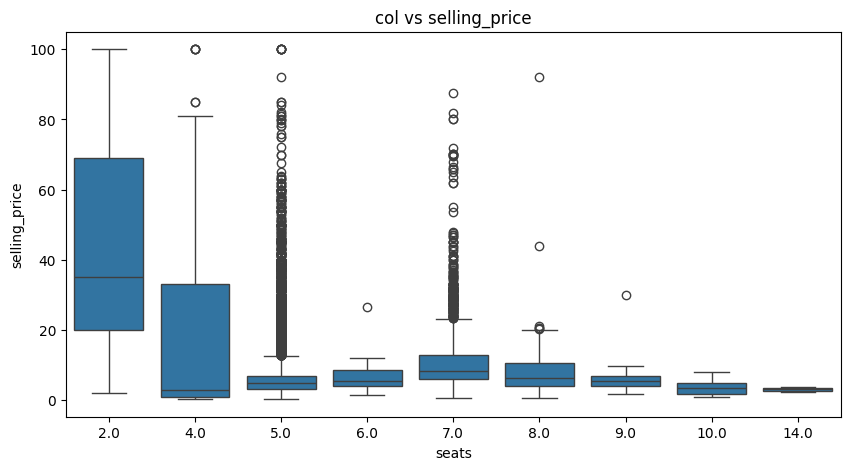

In [27]:
for col in ['seller_type', 'fuel_type', 'seats']:
    plt.figure(figsize=(10,5))
    sns.boxplot(y='selling_price',x=col, data=df)
    plt.title('col vs selling_price')
    plt.show()

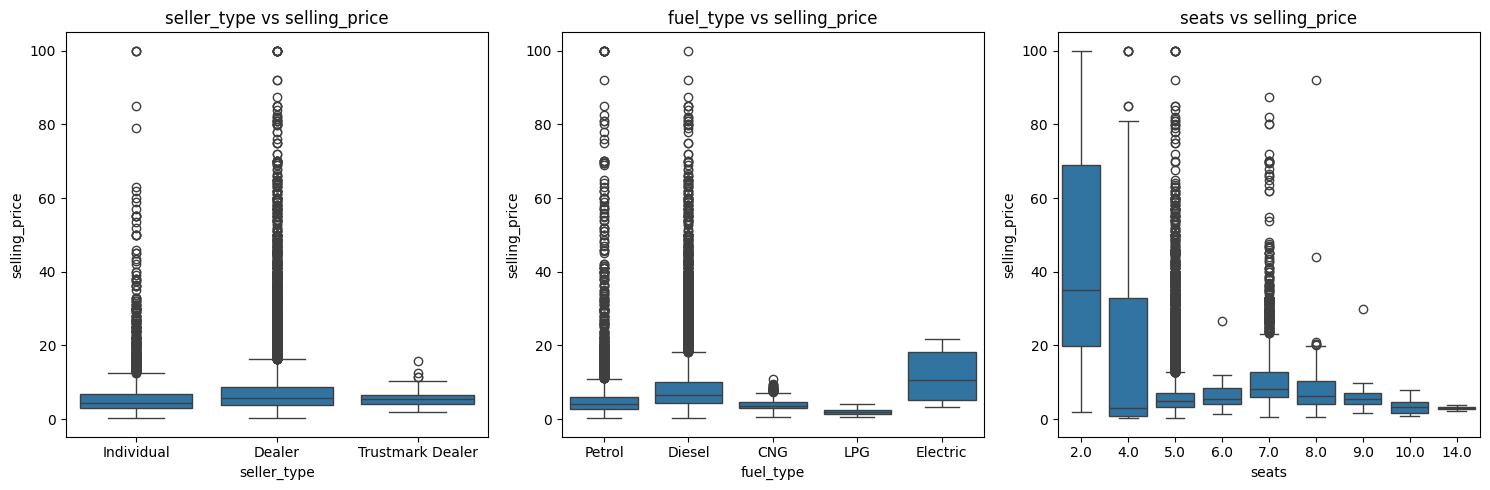

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, col in enumerate(['seller_type', 'fuel_type', 'seats']):
    sns.boxplot(y='selling_price', x=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs selling_price')

plt.tight_layout()
plt.show()

#### How can we transform the scale of selling-price for better visualisation?

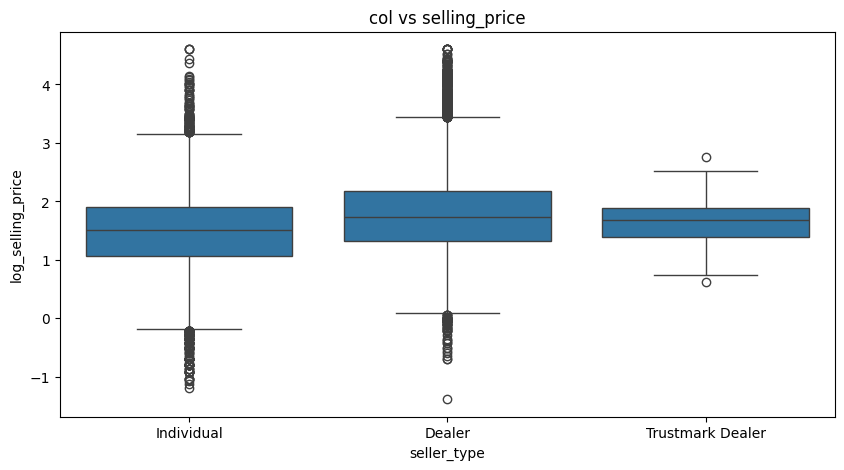

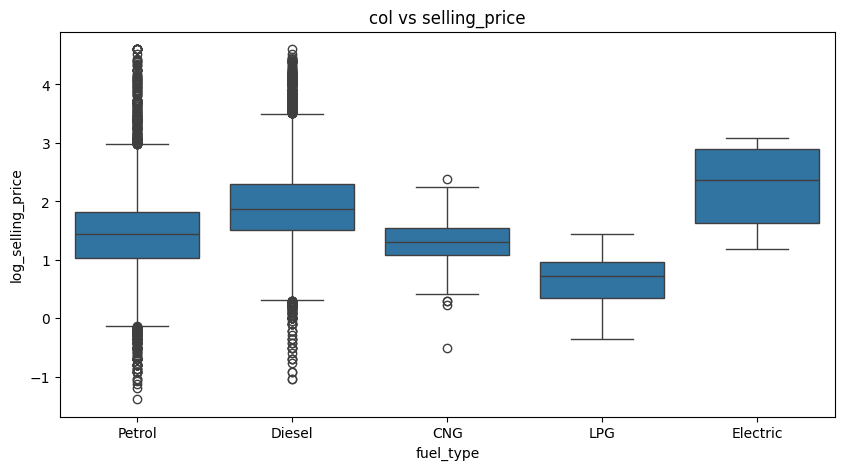

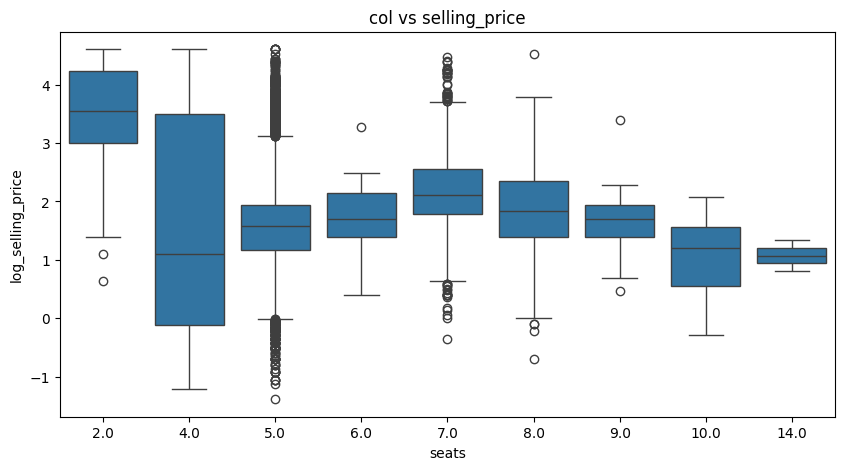

In [29]:
df["log_selling_price"] = np.log(df["selling_price"].values)

for col in ['seller_type', 'fuel_type', 'seats']:
    plt.figure(figsize=(10,5))
    sns.boxplot(y='log_selling_price',x=col, data=df)
    plt.title('col vs selling_price')
    plt.show()

 - `selling_price` of "coupe" is quite variational - important to be kept for predictive modelling

#### How many categories of "make" in the data?  

In [30]:
len(df["make"].unique())

42

There are 42 car brands in the data - too many levels, think of possible ways to encode them as numbers

#### What are item counts for different "make"?

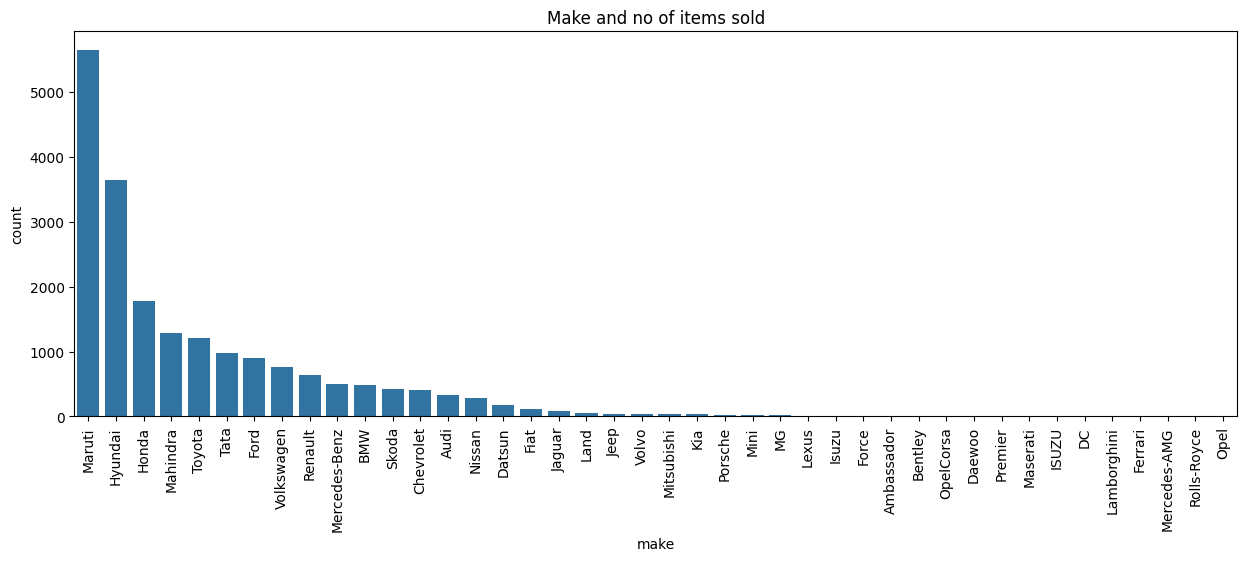

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(x='make', data=df, order = df['make'].value_counts().index)
plt.xticks(rotation=90);
plt.title("Make and no of items sold")
plt.show()

#### How is "make" related to the selling price?

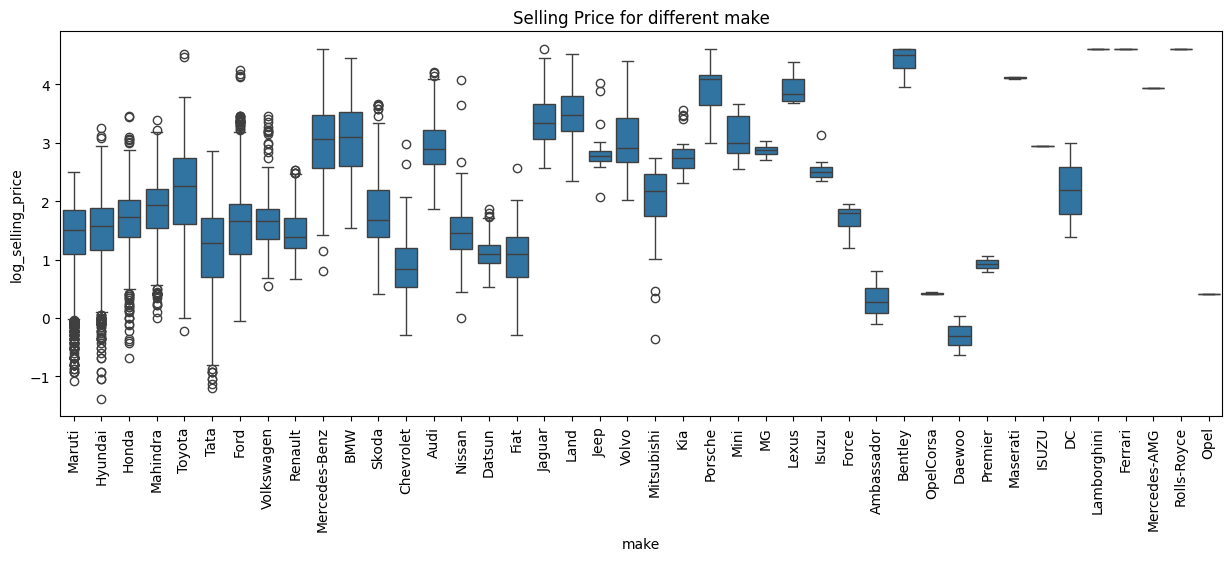

In [32]:
plt.figure(figsize=(15,5))
sns.boxplot(y='log_selling_price',x='make', data=df, order = df['make'].value_counts().index)
plt.xticks(rotation=90);
plt.title("Selling Price for different make")
plt.show()

Lets drop this column for now

In [33]:
df.drop("log_selling_price", axis=1, inplace=True)


> **How should we treat number of seats? Continuous OR Categorical ?**



> Number of seats is a variable with a finite discrete set of values. However it is orderd. If we make it categorical, it would be fed into the model as unordered.

> But we need to think do we want that order?

> Example: 2 seater cars are most likely more expensive than other cars. So in this sense 2 > 5.

**We actually would benefit from discarding the order.**


---
# Feature Engineering


In [34]:
df.head()

,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,make,model
0,1.20,2012.0,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5.0,Maruti,Alto Std
1,5.50,2016.0,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5.0,Hyundai,Grand i10 Asta
2,2.15,2010.0,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5.0,Hyundai,i20 Asta
3,2.26,2012.0,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5.0,Maruti,Alto K10 2010-2014 VXI
4,5.70,2015.0,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5.0,Ford,Ecosport 2015-2021 1.5 TDCi Titanium BSIV


### 1. Year

Sometimes it is good practice to convert the features into the way we actually understand. This will not necessarily help the model, but helps in us in understanding / interpreting predictions little better

- So lets convert year to more readable ***age***

In [35]:
from datetime import datetime

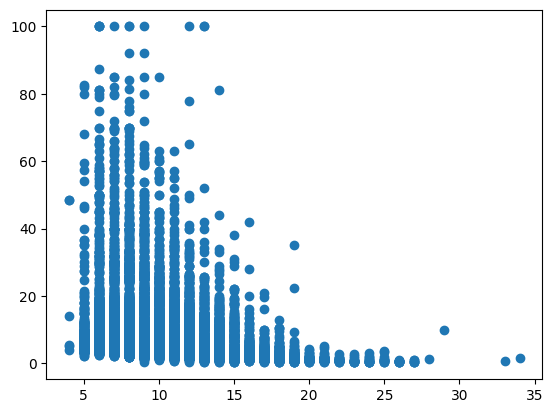

In [36]:
current_year = datetime.now().year
age = current_year - df['year']
plt.scatter(age, df.selling_price)

**Higher selling price for newer cars !!**

###**2. Categorical Encoding**

#### Q: How do we encode categorical variables for modelling?

#### 2.1 transmission_type (2 categories)

In [37]:
# explains how two category variable can be encoded as a binary variable
transmission_dummy = pd.get_dummies(df["transmission_type"])
df = pd.concat([df, transmission_dummy], axis=1)
df = df.drop(["transmission_type", "Automatic"], axis=1)
df = df.rename(columns={"Manual": "transmission_type"})
df.sample(frac=1).head(2)

,selling_price,year,seller_type,km_driven,fuel_type,mileage,engine,max_power,seats,make,model,transmission_type
17846,5.25,2016.0,Dealer,42000,Petrol,20.4,1197.0,83.11,5.0,Maruti,Swift LXI Option SP Limited Edition,True
4052,8.00,2017.0,Dealer,38000,Diesel,24.3,1248.0,88.50,5.0,Maruti,Vitara Brezza VDi,True


#### 2.2 fuel_type (5 categores)

In [38]:
fuel_type_dummy = pd.get_dummies(df["fuel_type"], prefix="seats")
fuel_type_dummy.sample(frac=1).head(2)

,seats_CNG,seats_Diesel,seats_Electric,seats_LPG,seats_Petrol
3524,False,True,False,False,False
8346,False,False,False,False,True


**NOTE:** We remove 1 of the dummy variables to avoid the dummy variable trap

In [39]:
fuel_type_dummy = fuel_type_dummy[fuel_type_dummy.columns[1:]]
fuel_type_dummy.head(2)

,seats_Diesel,seats_Electric,seats_LPG,seats_Petrol
0,False,False,False,True
1,False,False,False,True


In [40]:
pd.concat([df, fuel_type_dummy], axis=1).sample(frac=1).head(2)

,selling_price,year,seller_type,km_driven,fuel_type,mileage,engine,max_power,seats,make,model,transmission_type,seats_Diesel,seats_Electric,seats_LPG,seats_Petrol
11728,18.9,2015.0,Dealer,39000,Diesel,19.59,1995.0,184.0,5.0,BMW,3 Series 320d GT Sport Line,False,True,False,False,False
17984,7.0,2016.0,Individual,86000,Diesel,24.52,1248.0,88.5,7.0,Maruti,Ertiga SHVS VDI,True,True,False,False,False


#### 2.3 make (too many categoies)

In [41]:
df.make.nunique()

42

> **INTERACTION**
> - How to handle so many categories?
> **Hint:** Here we have too many categories. We can merge categories as in 'seats' variable or we can try target encoding. Dummy encoding would make too many features with highly diluted information.

Or we can try another technique known as **Target Encoding**

In [42]:
encoded_make = df.groupby('make')['selling_price'].transform('mean')

In [43]:
show_df = df[['make']].copy()
show_df['encoded_make'] = encoded_make
show_df = show_df.drop_duplicates()
print(len(show_df))
show_df.head()

42


,make,encoded_make
0,Maruti,4.684721
1,Hyundai,5.374923
4,Ford,6.265275
9,Mahindra,7.303129
10,Tata,4.395415


### **3. Scaling**

#### Q: Now, All these variables have different ranges. Does that work?

In [44]:
df.describe()

,selling_price,year,km_driven,mileage,engine,max_power,seats
count,19980.000000,19980.000000,1.998000e+04,19980.000000,19980.000000,19980.000000,19980.000000
mean,7.353527,2014.525125,5.824488e+04,19.347219,1476.327401,97.854443,5.317868
std,8.312958,3.249185,5.172509e+04,4.620053,520.449398,45.080670,0.835370
min,0.250000,1991.000000,1.000000e+02,0.000000,0.000000,5.000000,2.000000
25%,3.400000,2013.000000,3.116425e+04,16.800000,1197.000000,73.900000,5.000000
50%,5.200000,2015.000000,5.200000e+04,19.160000,1248.000000,86.700000,5.000000
75%,7.850000,2017.000000,7.400000e+04,22.320000,1582.000000,112.000000,5.000000
max,100.000000,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,14.000000


Lets scale this data. We will use MinMaxScaler here (in practice you can choose your scaling techniques depending on the problem, or just try all and see what works best)

In [45]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
scaler.fit(df[['selling_price', 'km_driven', 'mileage']])#The fit() method calculates the minimum and maximum values for each of these columns, which will be used later for scaling.

#The transform() method applies the scaling learned during the fit() step to the same specified columns. It scales each value in these columns based on the calculated minimum and maximum, mapping them to the range [0, 1]. The result is a NumPy array containing the scaled values.
scaled_values = scaler.transform(df[['selling_price', 'km_driven', 'mileage']])  # returns numpy.ndarray not df.
scaled_df = pd.DataFrame(scaled_values, columns=['selling_price', 'km_driven', 'mileage'])
scaled_df.head()

,selling_price,km_driven,mileage
0,0.009524,0.031553,0.164167
1,0.052632,0.005237,0.157500
2,0.019048,0.015764,0.141667
3,0.020150,0.009711,0.174333
4,0.054637,0.007869,0.189750


In [46]:
scaled_df.describe()

,selling_price,km_driven,mileage
count,19980.000000,19980.000000,19980.000000
mean,0.071213,0.015302,0.161227
std,0.083338,0.013612,0.038500
min,0.000000,0.000000,0.000000
25%,0.031579,0.008175,0.140000
50%,0.049624,0.013658,0.159667
75%,0.076190,0.019448,0.186000
max,1.000000,1.000000,1.000000


---
## Stichting it all together
These functions encapsulate several above mentioned data cleaning, transformation, and feature creation steps, thus streamlining the process.



In [47]:
def merge_seats(x):
    if 2 <= x <= 4:
        return '2-4'
    elif x > 5:
        return '>5'
    else:
        return '5'

def preprocess(df):
    df.dropna(inplace=True)
    df = df.loc[df.mileage != 0].copy() #This line filters the DataFrame to keep only rows where the mileage is not equal to 0
    outlier_theshold = df.selling_price.quantile(0.95)
    df.loc[df.selling_price > outlier_theshold, 'selling_price'] = outlier_theshold
    df['age'] = pd.to_datetime('now', utc=True).date().year - df['year']
    df['full_name'] = df['full_name'].str.upper()
    df['seats'] = df['seats'].apply(merge_seats)
    df.drop(columns=['year'])
    return df

def feature_engineering(df):
    df['make'] = df.full_name.apply(lambda x : x.split()[0])
    df['model'] = df.full_name.apply(lambda x : " ".join(x.split()[1:]))
    one_hot_encode_cols = ['seller_type', 'fuel_type', 'transmission_type', 'seats']
    for column in one_hot_encode_cols:
        df = pd.concat([df, pd.get_dummies(df[column]).iloc[: , 1:]], axis=1)
    df.drop(columns=one_hot_encode_cols + ['full_name'], inplace=True)
    df['make'] = df.groupby('make')['selling_price'].transform('median')
    df['model'] = df.groupby('model')['selling_price'].transform('median')
    scaler = MinMaxScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df

In [48]:
df = pd.read_csv("cars24-car-price.csv")
df = preprocess(df)
df = feature_engineering(df)
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.184371,0.042522,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.207231,0.225975,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.207231,0.120277,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.184371,0.093549,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.224624,0.300085,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [49]:
df.shape

(19820, 18)

#### Correlations with all numeric features

And before we wrap up, lets just see correlations of all variables since now we have all usable information in numerical form

<Axes: >

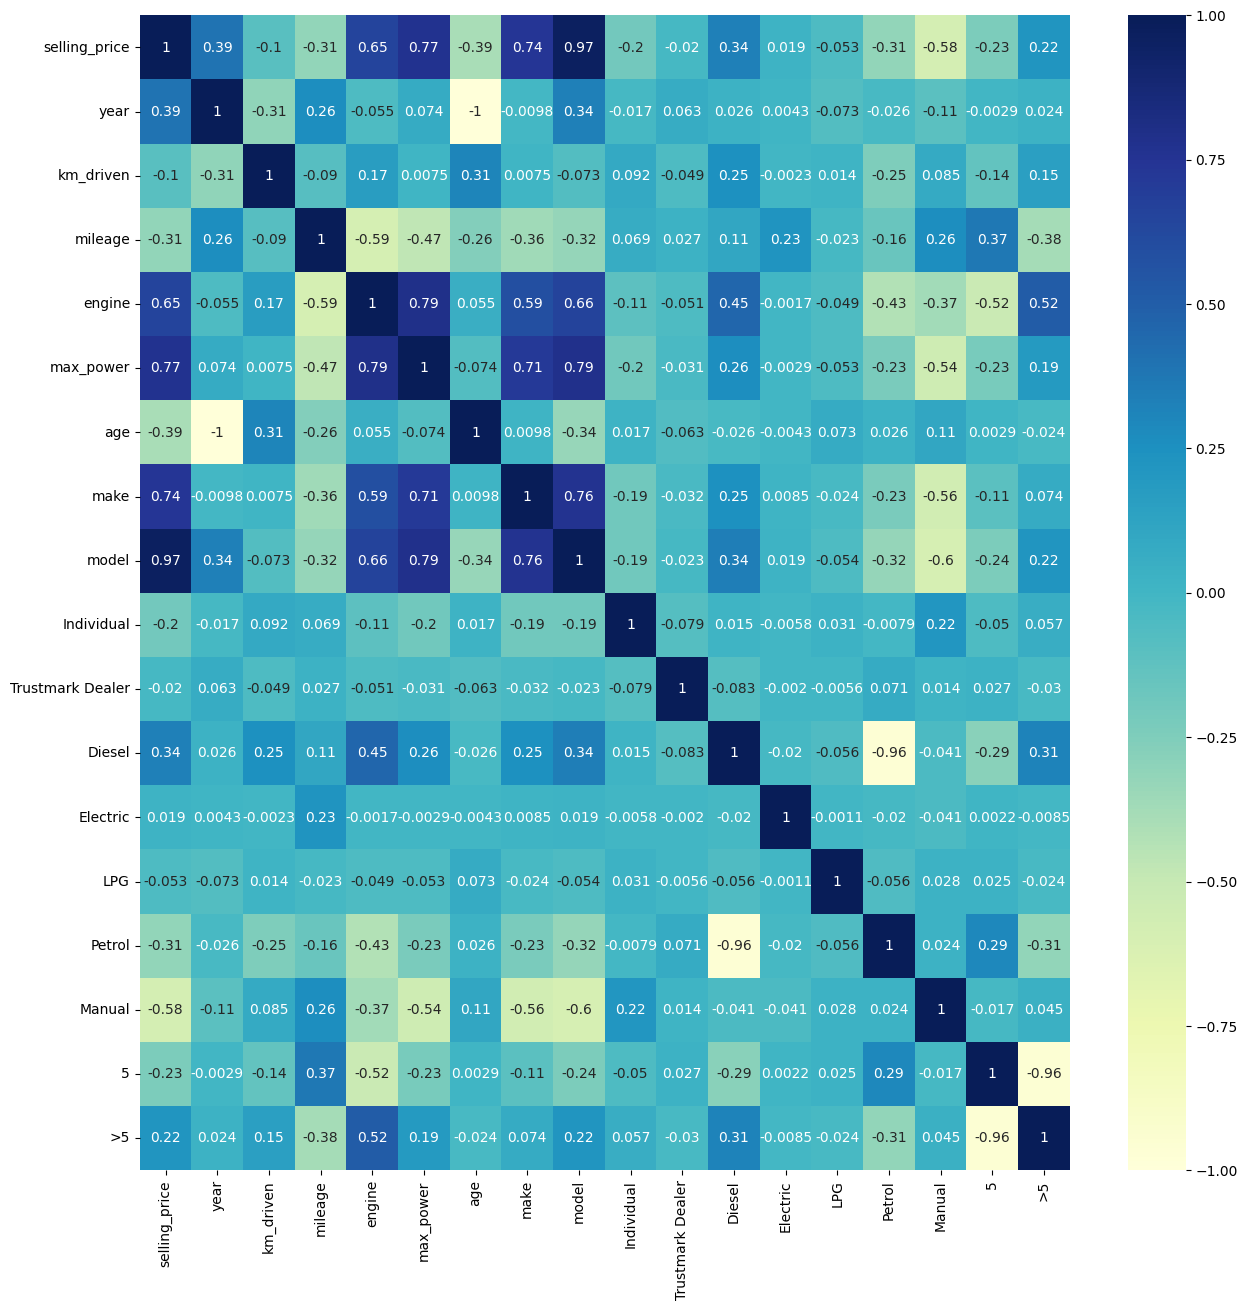

In [50]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

- `max_power`, `engine` and `transmission_type` are hightest correlated with `selling_price` in same order.
- New encoded features are weak predictor, but they together would might make strong predictors.

---

# Building the Linear Regression Model

Now let's see how we can split our data.

We will be using sklearn's test_train_split function for this.

In [51]:
from sklearn.model_selection import train_test_split

From our data:
*   The output data, y is the column selling_price
*   Remaining columns are the input data, X

In [52]:
y = df['selling_price']
X = df.drop('selling_price', axis=1)
y.shape, X.shape

((19820,), (19820, 17))

So we have to,

* predict 1 output feature
* using 17 input features.

Now let's split the data.

We will divide it into 70:30 ratio:
- 70% for training,
- and 30% for testing.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [54]:
X_train.shape, y_train.shape

((13874, 17), (13874,))

In [55]:
X_test.shape, y_test.shape

((5946, 17), (5946,))

We will use

* X_train and y_train to train our model,
* X_test and y_test to evaluate the model's performance.



**Training the Model**

In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
model.coef_

array([ 0.13746996, -0.25121765, -0.29240251,  0.10043239,  0.08654658,
       -0.13746996,  0.06115165,  0.81023052, -0.00852867, -0.00849669,
        0.00685598,  0.15563241,  0.01053148, -0.00985782, -0.00805117,
       -0.01751284, -0.0229756 ])

In [58]:
model.intercept_

np.float64(0.003080760593946852)

**Predicting target variable**

In [59]:
y_hat = model.predict(X_test)
y_hat

array([0.04121866, 0.22630018, 0.25194531, ..., 0.04820923, 0.15033767,
       0.51356805])

Using scatter plot to check corelation between predicted y and y_test

<ipython-input-60-b7929a74a965>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


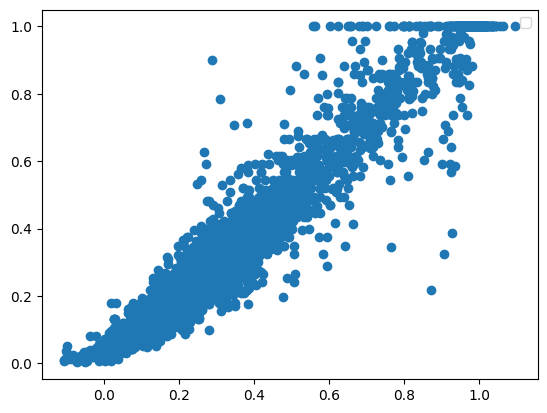

In [60]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(y_hat,y_test)
plt.legend()
plt.show()

In [61]:
model.score(X_train, y_train)

0.9425126871383865

In [62]:
model.score(X_test, y_test)

0.9413504833102504

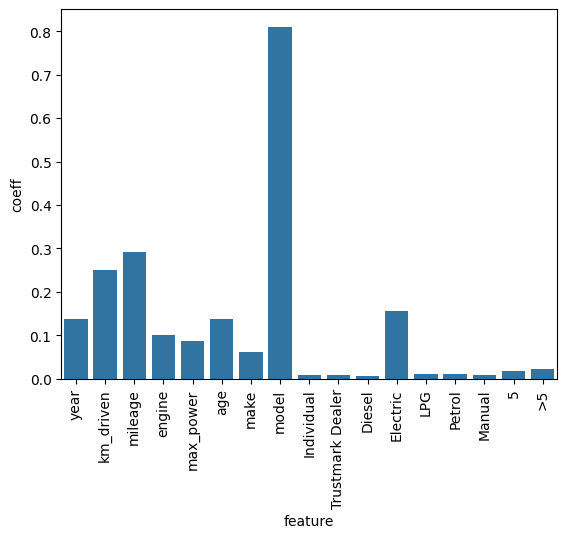

In [63]:
import seaborn as sns

imp = pd.DataFrame(list(zip(X_test.columns,np.abs(model.coef_))),
                   columns=['feature', 'coeff'])
sns.barplot(x='feature', y='coeff', data=imp)
plt.xticks(rotation=90)
plt.show()

#Implementing Linear Regression from Scratch

In [64]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=5):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, Y):
      # no_of_training_examples, no_of_features
      self.m, self.d = X.shape
      # weight initialization
      self.W = np.zeros(self.d)
      self.b = 0
      self.X = X
      self.Y = Y
      self.error_list=[]
      # gradient descent learning
      for i in range(self.iterations):
        self.update_weights()
        Y_pred=self.predict(self.X)
        error=np.square(np.subtract(Y,Y_pred)).mean()
        self.error_list.append(error)
      return self


    def update_weights(self):
      Y_pred = self.predict( self.X )
      # calculate gradients
      dW = - (2*(self.X.T ).dot(self.Y - Y_pred))/self.m
      db = - 2*np.sum(self.Y - Y_pred)/self.m
      # update weights
      self.W = self.W - self.learning_rate * dW
      self.b = self.b - self.learning_rate * db
      return self


    def predict(self, X):
      return np.dot(X, self.W)+self.b


    def r2_score(self, X, y):
      y_ = self.predict(X)
      ss_res = np.sum((y-y_)**2)
      ss_tot = np.sum((y- y.mean())**2)
      return 1- ss_res/ss_tot







In [65]:
X=df.drop('selling_price',axis=1)
y=df['selling_price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#Training the model
lr=LinearRegression(learning_rate=0.01,iterations=10000)
lr.fit(X_train,y_train)

In [66]:
lr.predict(X_test)

array([0.06987983, 0.22613904, 0.94751783, ..., 0.38696877, 0.16184302,
       0.2911841 ])

In [67]:
lr.r2_score(X_test,y_test)

np.float64(0.9394493613474575)

In [68]:
lr.r2_score(X_train,y_train)

np.float64(0.9401844781129682)

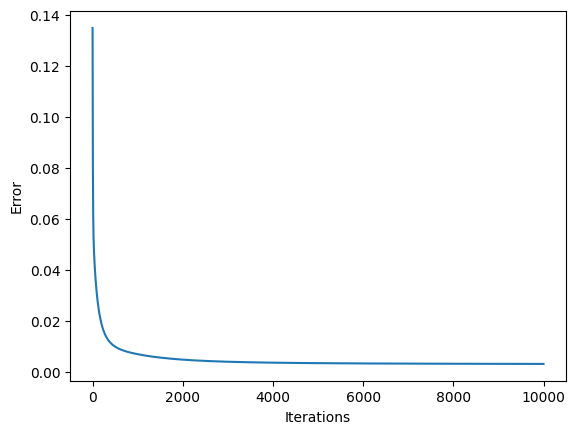

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(lr.error_list)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

## Statsmodel

In [70]:
import statsmodels.api as sm
y_train = np.array(y_train)
X_sm = sm.add_constant(X_train) #statsmodel default is without intercept,to add intercept we need to

In [71]:
model=sm.OLS(y_train,X_sm)
results=model.fit()

In [72]:
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 1.630e+04
Date:                Sat, 31 May 2025   Prob (F-statistic):               0.00
Time:                        18:53:08   Log-Likelihood:                 23057.
No. Observations:               15856   AIC:                        -4.608e+04
Df Residuals:                   15839   BIC:                        -4.595e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.118e+11   9.37e+10  

In [73]:
print(results.predict(X_sm))

19738    0.455274
17034    0.263059
17080    0.283985
7420     0.143801
15375    0.364155
           ...   
9372     0.138915
7291     0.192349
17728    0.426026
7293     0.194047
17673    0.305647
Length: 15856, dtype: float64


##Multi-Collinearity

In [74]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df[df.columns.drop('selling_price')]
y = df["selling_price"]

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame() #Creating a blank dataframe and assined it variable vif

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
3443,0.724138,0.017606,0.100000,0.221712,0.179227,0.275862,0.239533,0.202892,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
16090,0.862069,0.009184,0.142328,0.147808,0.099903,0.137931,0.184371,0.176163,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
11070,0.827586,0.034185,0.151552,0.184834,0.134783,0.172414,0.140142,0.198032,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
19214,0.896552,0.011360,0.122069,0.177133,0.131723,0.103448,0.224624,0.239339,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
17843,0.655172,0.012606,0.105172,0.221120,0.169082,0.344828,0.207231,0.142146,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [77]:
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

In [78]:
X_sm = sm.add_constant(X_tr_scaled)

In [79]:
sm_model = sm.OLS(y_train, X_sm).fit()

In [80]:
print(sm_model.summary())


                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.497e+04
Date:                Sat, 31 May 2025   Prob (F-statistic):               0.00
Time:                        18:53:08   Log-Likelihood:                 22949.
No. Observations:               15856   AIC:                        -4.586e+04
Df Residuals:                   15838   BIC:                        -4.572e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3050      0.000    674.441      0.0

In [81]:
vif.head()

""


In [82]:
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
X_t.head(5)

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-0.486954,0.158764,-0.896858,0.040307,0.404950,0.486954,-0.178317,-0.433228,-0.803747,-0.100003,-0.986220,-0.021016,-0.058458,1.025553,-2.023235,0.448465,-0.428013
1,0.763433,-0.429161,0.231029,-0.922002,-0.692532,-0.763433,-0.435189,-0.548862,1.244173,-0.100003,-0.986220,-0.021016,-0.058458,1.025553,0.494258,0.448465,-0.428013
2,0.450836,1.316242,0.476821,-0.439884,-0.209961,-0.450836,-0.641149,-0.454252,1.244173,-0.100003,1.013972,-0.021016,-0.058458,-0.975083,-2.023235,0.448465,-0.428013
3,1.076029,-0.277293,-0.308795,-0.540164,-0.252291,-1.076029,-0.247742,-0.275545,-0.803747,-0.100003,-0.986220,-0.021016,-0.058458,1.025553,0.494258,0.448465,-0.428013
4,-1.112147,-0.190317,-0.759031,0.032593,0.264590,1.112147,-0.328737,-0.696032,1.244173,-0.100003,1.013972,-0.021016,-0.058458,-0.975083,0.494258,0.448465,-0.428013


In [83]:
vif['Features'] = X_t.columns
vif

,Features
0,year
1,km_driven
2,mileage
3,engine
4,max_power
5,age
6,make
7,model
8,Individual
9,Trustmark Dealer


In [84]:
 X_t.values


array([[-0.48695362,  0.15876399, -0.89685782, ..., -2.02323478,
         0.4484653 , -0.42801318],
       [ 0.76343287, -0.42916149,  0.23102856, ...,  0.49425801,
         0.4484653 , -0.42801318],
       [ 0.45083625,  1.31624227,  0.47682051, ..., -2.02323478,
         0.4484653 , -0.42801318],
       ...,
       [ 0.45083625, -0.29081528, -0.96806857, ...,  0.49425801,
         0.4484653 , -0.42801318],
       [-0.48695362, -0.79661492, -0.14340215, ..., -2.02323478,
         0.4484653 , -0.42801318],
       [-0.174357  , -0.53939752, -1.03468508, ...,  0.49425801,
         0.4484653 , -0.42801318]])

In [85]:
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [86]:
vif

,Features,VIF
0,year,inf
1,km_driven,1.210269
2,mileage,3.225189
3,engine,6.258512
4,max_power,4.998503
5,age,inf
6,make,3.216600
7,model,5.788645
8,Individual,1.087429
9,Trustmark Dealer,1.021988


In [87]:
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,year,inf
5,age,inf
13,Petrol,18.30
10,Diesel,17.30
16,>5,13.04
15,5,11.75
3,engine,6.26
7,model,5.79
4,max_power,5.00
2,mileage,3.23


In [88]:
cols2 = vif["Features"][1:].values
cols2

array(['age', 'Petrol', 'Diesel', '>5', '5', 'engine', 'model',
       'max_power', 'mileage', 'make', 'Manual', 'LPG', 'Electric',
       'km_driven', 'Individual', 'Trustmark Dealer'], dtype=object)

In [89]:
X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

In [90]:
X2_sm = sm.add_constant(X2)

In [91]:
sm_model = sm.OLS(list(y_train), X2_sm).fit()

In [92]:
print(sm_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Sat, 31 May 2025   Prob (F-statistic):               0.00
Time:                        18:53:09   Log-Likelihood:                 22936.
No. Observations:               15856   AIC:                        -4.584e+04
Df Residuals:                   15839   BIC:                        -4.571e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3050      0.000  

##Automating VIF

In [93]:
#Setting Threshold
#adj R2 >= 0.85
#vif >= 5

vif_thr = 5
r2_thr = 0.85

In [94]:
i = 1
feats_removed = ['year']

In [95]:
while True:
  vif = pd.DataFrame()
  X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]
  vif['Features'] = cols2
  vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)

  cols2 = vif["Features"][1:].values
  X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

  X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
  sm_model = sm.OLS(list(y_train), X2_sm).fit()
  if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
    print('Reached threshold')
    print('Highest vif:',vif.iloc[0])
    print('Current adj.R2',sm_model.rsquared_adj)
    print('Features removed:', i)
    print('List of features removed:', feats_removed)
    break
  feats_removed.append(vif.iloc[0]['Features'])
  i += 1

Reached threshold
Highest vif: Features    model
VIF          5.75
Name: 0, dtype: object
Current adj.R2 0.8318553555450335
Features removed: 4
List of features removed: ['year', 'Petrol', '>5', 'engine']


In [96]:
print(vif)
print(sm_model.summary())

            Features   VIF
0              model  5.75
1          max_power  3.31
2               make  3.16
3            mileage  2.28
5                age  1.88
6             Manual  1.77
4             Diesel  1.66
7                  5  1.47
9          km_driven  1.20
8           Electric  1.18
10        Individual  1.08
11  Trustmark Dealer  1.02
12               LPG  1.01
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     6538.
Date:                Sat, 31 May 2025   Prob (F-statistic):               0.00
Time:                        18:53:10   Log-Likelihood:                 14595.
No. Observations:               15856   AIC:                        -2.916e+04
Df Residuals:                   15843   BIC:                        -